<a href="https://colab.research.google.com/github/velmer/ri-lab-03/blob/master/ri_lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer as RSLPStemmer
from nltk import word_tokenize

nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')


_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Carregando Coleção

In [0]:
data = pd.read_csv("results.csv")
data.head()

,title,sub_title,author,date,section,text,url
0,VÍDEO – “Estarei nas ruas com a militância do ...,Não possui,Pedro Zambarda de Araujo,05/04/2019 22:44:19,Não possui,Não ficaremos calados diante da injustiça. Lul...,https://www.diariodocentrodomundo.com.br/video...
1,Essencial do DCM – Bolsonaro diz que não nasce...,Não possui,Pedro Zambarda de Araujo,05/04/2019 21:00:02,Não possui,O jornalismo do DCM precisa de você para conti...,https://www.diariodocentrodomundo.com.br/essen...
2,Conheça o deputado árabe que pode derrubar o p...,Não possui,Diario do Centro do Mundo,05/04/2019 22:00:56,Não possui,A revista francesa L’Obs desta semana traz um ...,https://www.diariodocentrodomundo.com.br/conhe...
3,"VÍDEO – Guedes, as tchutchucas e a lacrada des...",Não possui,Nathalí Macedo,05/04/2019 16:23:14,Não possui,O jornalismo do DCM precisa de você para conti...,https://www.diariodocentrodomundo.com.br/video...
4,O que está por trás da articulação para Lula t...,Não possui,Joaquim de Carvalho,05/04/2019 21:42:17,Não possui,.x.x.x.Veja o vídeo “Foi para isso que prender...,https://www.diariodocentrodomundo.com.br/o-que...


# Questão 1

A minha estratégia de tokenização é caracterizar palavras como sequência de caracteres que possuam caracteres alfanuméricos e no mínimo tamanho 2. Pois, na coleção utilizada existem muitas siglas de estados (e.g. SP, PB, BA, etc.), as quais são formadas por apenas 2 letras, caso fosse adotada uma estratégia para considerar palavras que possuíssem mais de 2 caracteres, estaríamos perdendendo tais siglas. Além disso, as palavras são terminadas por espaço, por a coleção se tratar de textos de notícias.

Porém, ao considerar palavras com 2 caracteres, poderíamos comprometer o funcionamento do processador de texto, pois estaríamos considerando muitas preposições, artigos, entre outros (e.g. da, do, ao, etc.). Nesse sentido, utilizei o filtro de stopwords, para remover tais palavras que influenciariam diretamente nos resultados do processamento do texto.

Outra medida foi não adotar a unificação das caixas das palavras, ou seja, não transformei letras maiúsculas em minúsculas, ou vice-versa. Pois, por exemplo as palavras "Estado" e "estado" podem ter significados diferentes apenas por diferenciar a caixa da letra inicial, a primeira significando a entidade relacionada ao governo de um estado como Paraíba, e a segunda podendo significar as condições de algo/alguém em um determinado momento. Ademais, há casos em que nomes próprios também possuem significado como substantivos comuns, como por exemplo "Jardim", então manter a inicial maiúscula diferencia o sobrenome de uma pessoa de um ambiente de uma casa.

Por fim, decidi não separar palavras que possuem hífen, pois para a coleção atual tais palavras possuem significados importantes da maneira que estão, não com os significados das palavras utilizadas nas junções por hífen.

In [0]:
def is_tokenized_word(word):
  """
    Returns if the specified word matches all requirements
    to be a valid token.
  """
  return len(word) > 1 and any(c.isalnum() for c in word)

collection = data["text"].apply(lambda x: word_tokenize(x)).sum()

# Maintain words that are considered to be a valid token (i.e. have at least lenght 2 and 1 alphanumeric character)
words = [word for word in collection if is_tokenized_word(word)]

# Remove stopwords
words = [word for word in words if word.lower() not in _stopwords]

tokens = words

# Questão 2

In [0]:
freq_table = pd.DataFrame(tokens, columns=['word']).word.value_counts().reset_index()
freq_table.columns = ['Word', 'Freq.']
freq_table['r'] = freq_table['Freq.'].rank(ascending=False, method='first')
pr = freq_table['Freq.'] / len(tokens) * 100
rpr = freq_table['r'] * pr / 100
freq_table['Pr (%)'] = round(pr, 3)
freq_table['r.Pr'] = round(rpr, 3)
freq_table.head(50)

,Word,Freq.,r,Pr (%),r.Pr
0,vida,736,1.0,0.671,0.007
1,nacional,702,2.0,0.640,0.013
2,ponto,685,3.0,0.625,0.019
3,precisa,679,4.0,0.619,0.025
4,continuar,656,5.0,0.598,0.030
5,DCM,646,6.0,0.589,0.035
6,jornalismo,641,7.0,0.584,0.041
7,marcando,633,8.0,0.577,0.046
8,Bolsonaro,563,9.0,0.513,0.046
9,ser,430,10.0,0.392,0.039


# Questão 3

Para encontrar os stemmings utilizei o código abaixo, agrupando-os pelos radicais:


In [0]:
stemmer = nltk.stem.RSLPStemmer()
stemmed_tokens_dict = {}
for token in tokens:
  current_stem = stemmer.stem(token)
  if (current_stem not in stemmed_tokens_dict):
    stemmed_tokens_dict[current_stem] = set()
  stemmed_tokens_dict[current_stem].add(token)


### Falso-positivos

Estão listados os radicais e dois dos tokens que correspondem ao respectivo radical, porém que não deveriam corresponder.

**di**: ("diante", "diariamente")

**pres**: ("Presente", "preso")

**prov**: ("prova", "provedor")

**est**: ("Estado", "esteira")

**med**: ("Medeiros", "medida")

**franc**: ("Francesa", "francamente")

**cond**: ("condado", "condições")

**lad**: ("ladeira", "lados")

**dur**: ("duração", "dureza")

**pass**: ("Passarinho", "Passe")

### Falso-negativos

Estão listados pares de tokens que deveriam corresponder ao mesmo radical, mas não estão.

**eleitor** (elei) e **eleição** (ele)

**precária** (precár) e **precarização** (precari)

**incendiária** (incendiár) e **incendiava** (incend)

**Advocacia** (advocac) e **Advocacia-Geral** (advocacia-ger)

**Regular** (regul) e **regularmente** (regularm)

**Superior** (super) e **Superioridade** (superior)

**assegurar** (asseg) e **Asseguram** (assegur)

**ano** (ano) e **anual** (anual)

**Constituição** (constituiçã) e **Constituinte** (constituint)

**viagens** (viagen) e **viagem** (viag)

# Questão 4

Nesta questão é exibido o gráfico solicitado de Rank vs Frequência para os stemmings encontrados. Enquantos os pontos azuis representam o valor encontrado para os stemmings, a reta representa o valor de C para o melhor ajuste, ou seja, o valor esperado. Para calcular tal valor esperado foi utilizada a média de R*PR.

Como diversas palavras são reduzidas para o mesmo radical, podemos considerar que a frequência dos pontos aumenta bastante, enquanto a quantidade de pontos - que antes eram palavras e agora são radicais - diminui consideravelmente.

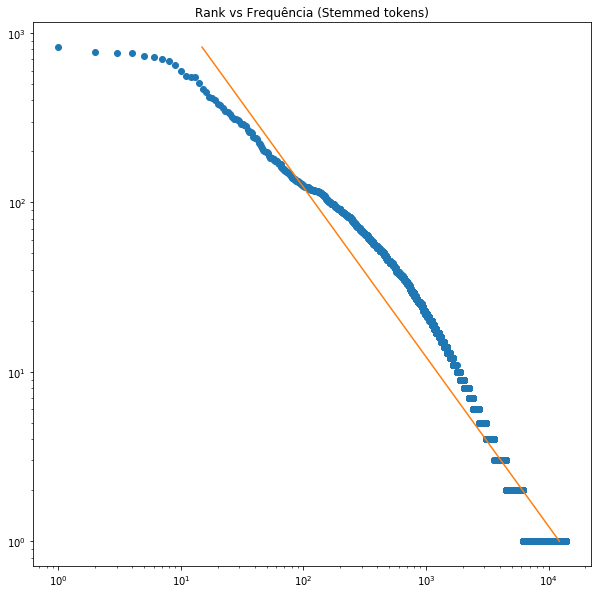

In [106]:
stemmer = nltk.stem.RSLPStemmer()
stemmed_tokens = []
for token in tokens:
  stemmed_tokens.append(stemmer.stem(token))

stemmed_tokens_table = pd.DataFrame(stemmed_tokens, columns=['word'])

stemmed_tokens_table = stemmed_tokens_table.word.value_counts().reset_index()
stemmed_tokens_table.columns = ['word', 'freq']
stemmed_tokens_table['r'] = stemmed_tokens_table.freq.rank(ascending=False, method='first')

pr_stemming = stemmed_tokens_table.freq / len(stemmed_tokens) * 100
rpr_stemming = stemmed_tokens_table.r * pr_stemming / 100


stemmed_tokens_table['pred'] = np.mean(rpr_stemming) / pr_stemming * 100

%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

plt.plot(stemmed_tokens_table['r'], stemmed_tokens_table['freq'], linestyle="", marker='o')
plt.plot(stemmed_tokens_table['pred'], stemmed_tokens_table['freq'], linestyle="-", marker='')
plt.title('Rank vs Frequência (Stemmed tokens)')
plt.show()


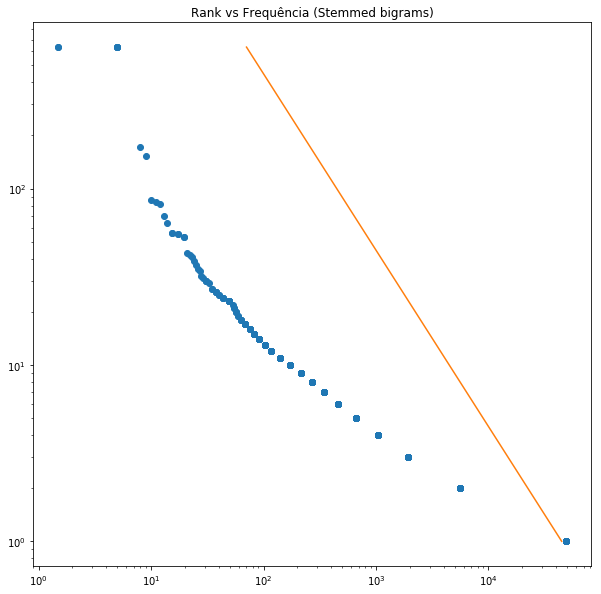

In [107]:
stemmed_bigrams = list(nltk.bigrams(stemmed_tokens))
stemmed_bigrams_freq = nltk.FreqDist(stemmed_bigrams)
stemmed_bigrams_table = pd.DataFrame(data=stemmed_bigrams_freq.most_common(), columns=['word', 'freq'])
stemmed_bigrams_table['r'] = stemmed_bigrams_table.freq.rank(ascending=False)

pr_bigrams_stemming = stemmed_bigrams_table.freq / len(stemmed_bigrams) * 100
rpr_bigrams_stemming = stemmed_bigrams_table.r * pr_bigrams_stemming / 100

stemmed_bigrams_table['pred'] = np.mean(rpr_bigrams_stemming) / pr_bigrams_stemming * 100

%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

plt.plot(stemmed_bigrams_table['r'], stemmed_bigrams_table['freq'], linestyle="", marker='o')
plt.plot(stemmed_bigrams_table['pred'], stemmed_bigrams_table['freq'], linestyle="-", marker='')
plt.title('Rank vs Frequência (Stemmed bigrams)')
plt.show()
